# How does price fare changes affect the amount of people using the station? #
$2.25 base fare (December 30, 2010 – March 2, 2013)

$2.50 base fare (March 3, 2013 – March 21, 2015)

$2.75 base fare (March 22, 2015 – present)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import ast
from datetime import datetime

%matplotlib inline

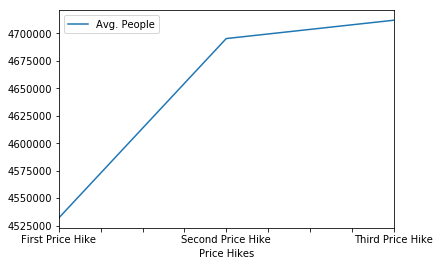

In [2]:
with open('output/pricehike-overall.txt') as f:
    pricehike_overall = f.read()
pricehike_overall = ast.literal_eval(pricehike_overall)
pricehike_overall  = sorted(pricehike_overall)

updateOverallTags = []
for values in pricehike_overall:
    if values[0] == 'A':
        updateOverallTags.append(('First Price Hike', values[1]))
    if values[0] == 'B':
        updateOverallTags.append(('Second Price Hike', values[1]))
    if values[0] == 'C':
        updateOverallTags.append(('Third Price Hike', values[1]))

# convert to dataframe
dfOverall = pd.DataFrame(updateOverallTags)
dfOverall.columns = ['Price Hikes','Avg. People']
dfOverall.plot(x='Price Hikes', y='Avg. People', kind='line')

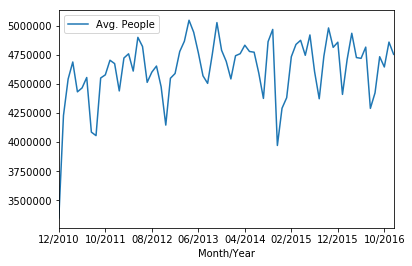

In [3]:
with open('output/pricehike-monthly.txt') as f:
    pricehike_monthly = f.read()
pricehike_monthly = ast.literal_eval(pricehike_monthly)
pricehike_monthly = sorted(pricehike_monthly, key=lambda x: datetime.strptime(x[0], "%m/%Y"))

# convert to dataframe
dfMonthly = pd.DataFrame(pricehike_monthly)
dfMonthly.columns = ['Month/Year','Avg. People']
dfMonthly.plot(x='Month/Year', y='Avg. People', kind='line')

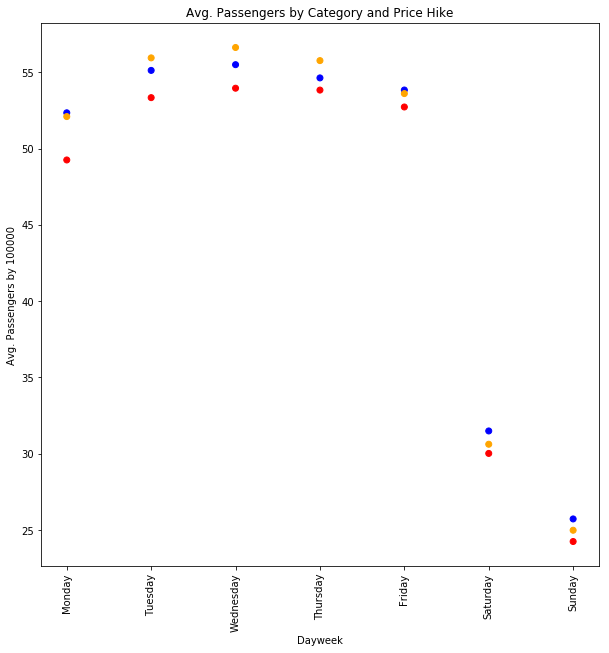

In [6]:
with open('output/pricehike-dayweek.txt') as f:
    pricehike_dayweek = f.read()
pricehike_dayweek = ast.literal_eval(pricehike_dayweek)
pricehike_dayweek = sorted(pricehike_dayweek, key=lambda x: x[0][0])

# flatten first
# convert to dataframe
flatList = []
for items in pricehike_dayweek:
    flatList.append((items[0][0], items[0][1], items[1]))
dfDayweek = pd.DataFrame(flatList)
dfDayweek.columns = ['Dayweek', 'Category','AvgPeople']
(listDayweek, listCat, listAvg) = (dfDayweek.Dayweek.tolist(), \
                                     dfDayweek.Category.tolist(), \
                                     dfDayweek.AvgPeople.tolist())

listDayweekTags = []
for values in listDayweek:
    if values == 'Monday':
        listDayweekTags.append(1)
    if values == 'Tuesday':
        listDayweekTags.append(2)
    if values == 'Wednesday':
        listDayweekTags.append(3)
    if values == 'Thursday':
        listDayweekTags.append(4)
    if values == 'Friday':
        listDayweekTags.append(5)
    if values == 'Saturday':
        listDayweekTags.append(6)
    if values == 'Sunday':
        listDayweekTags.append(7)
        
df = pd.DataFrame(dict(dayweek=listDayweekTags, people=listAvg, color=listCat))
df['people'] = df['people']/100000
fig, ax = plt.subplots(figsize=(10,10))
colors = {'A':'red', 'B':'blue', 'C':'orange'}
ax.scatter(df['dayweek'], df['people'], c=df['color'].apply(lambda x: colors[x]))
renamed = ['', 'Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set_xticklabels(renamed, rotation='vertical')
ax.set_xlabel('Dayweek')
ax.set_ylabel('Avg. Passengers by 100000')
ax.set_title('Avg. Passengers by Category and Price Hike')
plt.show()